In [9]:
from utils.configuration import get_config_from_json
from utils.training_utilities import set_GPU
from utils.plotting_traces import plot_traces
from seq2point.seq2point import SEQ2POINT
from dataset_management.dataloader import Seq2PointDataLoader
import builtins

In [10]:
builtins.MODEL_CONFIG = get_config_from_json(description="Model Parameters", config_file="configs/model_config.json")
builtins.DATASET_CONFIG = get_config_from_json(description="Dataset Management", config_file="configs/dataset_config.json")
builtins.PLOT_CONFIG = get_config_from_json(description="Plot Settings", config_file="configs/plot_config.json")
builtins.TRAINING_CONFIG = get_config_from_json(description="Training Configuration", config_file="configs/training_config.json")

In [11]:
TRAINING_CONFIG['EXPERIMENT_PATH'] = f'experiments/{TRAINING_CONFIG["TARGET_APPLIANCE"]}/{TRAINING_CONFIG["TARGET_HOUSES"]["TRAIN"]}/'

In [12]:
dataloaders = Seq2PointDataLoader(
    target_appliance=TRAINING_CONFIG['TARGET_APPLIANCE'], 
    target_houses= TRAINING_CONFIG['TARGET_HOUSES'], 
    proportion = TRAINING_CONFIG['SPLIT_PROPORTION'], 
    subset_days = TRAINING_CONFIG['SUBSET_DAYS'],
    # scalers_directory = TRAINING_CONFIG['EXPERIMENT_PATH'],
    # normalize_with=TRAINING_CONFIG['NORMALIZE']
)

Loading data for appliance KETTLE ...
Fetching KETTLE data for House 2
Resampling for house number:  2
Updating data with resampled dataset...
Subetting dataset with 10 days of most activities for House 2
Estimating active durations of: kettle
Updating data with selected active appliance activities...
Updating splits with specified proportion from every target house...

Creating dataloaders...
Data Loaders are successfully initialized.
Followings are the refit_loader configuration 
{'DATA_FOLDER': 'data/refit/', 'DATA_TYPE': '.csv', 'README_FILE': 'refit_loader/REFIT_Readme.txt', 'REFIT_HOUSES': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21]}

Loading specified buildings: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21]
Parsing the readme file specified: refit_loader/REFIT_Readme.txt
Loading data for appliance KETTLE ...
Fetching KETTLE data for House 2
Resampling for house number:  2
Updating data with resampled dataset...
Subetting data

In [13]:
network = SEQ2POINT().to(set_GPU())
results = network.run(dataloaders.train_dataloader, dataloaders.validation_dataloader, assess_training=True)


Initializing SEQ2POINT model archiecture

Followings are the Model Parameters of your network architecture..
{'CONV_KERNEL': [10, 8, 6, 5, 5],
 'CONV_LAYERS': 5,
 'CONV_PADDING': 0,
 'CONV_STRIDE': 1,
 'DESCRIPTION': 'Model Parameters',
 'INPUT_CHANNELS': [1, 30, 30, 40, 50],
 'LEFT_PAD': [4, 3, 2, 2, 2],
 'LINEAR_INPUT': [29950, 1024],
 'LINEAR_LAYERS': 2,
 'LINEAR_OUTPUT': [1024, 1],
 'OUTPUT_CHANNELS': [30, 30, 40, 50, 50],
 'POOL_KERNEL': [],
 'POOL_STRIDE': [],
 'RIGHT_PAD': [5, 4, 3, 2, 2],
 'SEQUENCE_LENGTH': 599}

SEQ2POINT model archiecture has been initialized.


Followings are the Training Configuration of your experiment..
{'DESCRIPTION': 'Training Configuration',
 'EARLY_STOPPING_THRESHOLD': 5,
 'EXPERIMENT_PATH': 'experiments/KETTLE/[2]/',
 'LEARNING_RATE': 0.0001,
 'LOSS': 'nn.MSELoss',
 'LOSS_REDUCTION': 'mean',
 'NORMALIZE': 'Standard',
 'NUM_EPOCHS': 5,
 'OPTIMIZER': 'optim.Adam',
 'PRE_TRAINED_MODEL_FLAG': False,
 'SPLIT_PROPORTION': {'TEST_PERCENT': 0.2,
          

Saving the Training Loss vs Validation Loss plot...



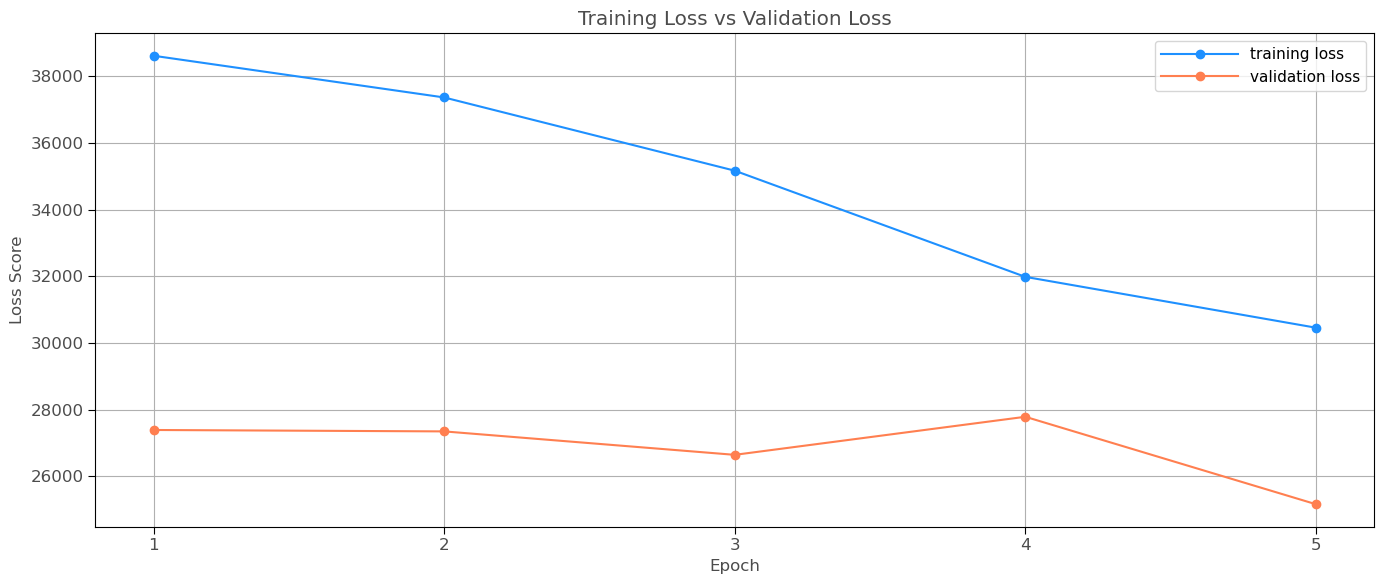

Saving the Training Loss vs Validation Loss plot...



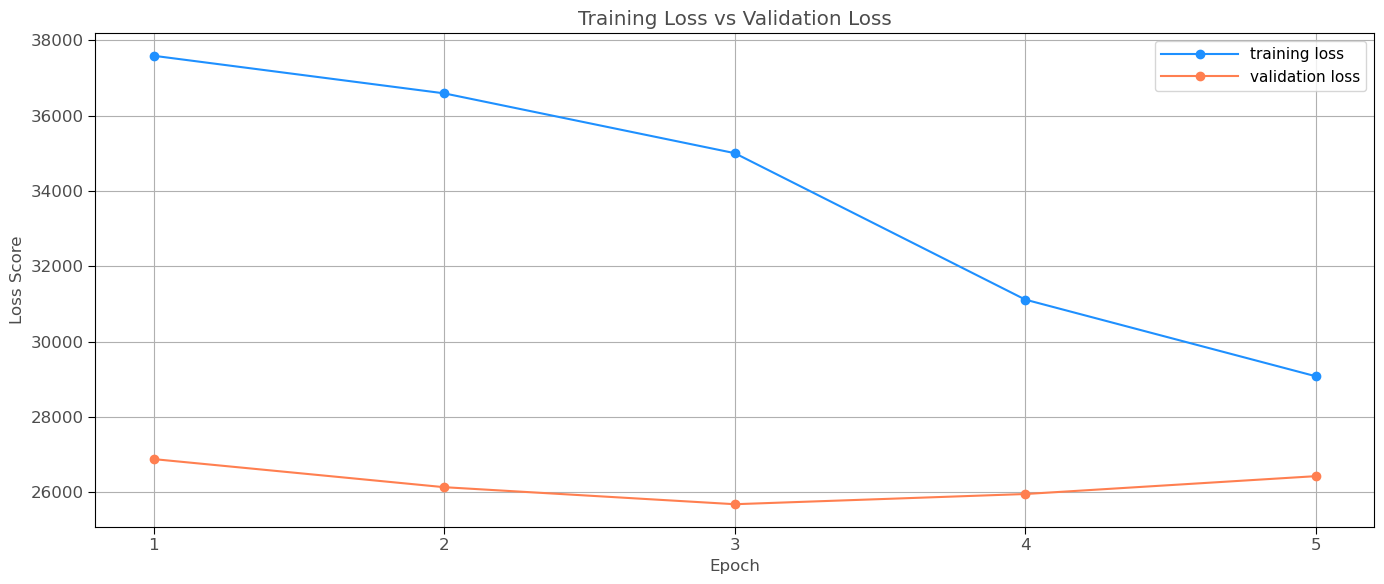

In [14]:
plot_traces(traces=results, labels = ['training loss', 'validation loss'], axis_labels=['Epoch', 'Loss Score'] , title="Training Loss vs Validation Loss")

In [7]:
test_network = SEQ2POINT().to(set_GPU())


Initializing SEQ2POINT model archiecture

Followings are the Model Parameters of your network architecture..
{'CONV_KERNEL': [10, 8, 6, 5, 5],
 'CONV_LAYERS': 5,
 'CONV_PADDING': 0,
 'CONV_STRIDE': 1,
 'DESCRIPTION': 'Model Parameters',
 'INPUT_CHANNELS': [1, 30, 30, 40, 50],
 'LEFT_PAD': [4, 3, 2, 2, 2],
 'LINEAR_INPUT': [29950, 1024],
 'LINEAR_LAYERS': 2,
 'LINEAR_OUTPUT': [1024, 1],
 'OUTPUT_CHANNELS': [30, 30, 40, 50, 50],
 'POOL_KERNEL': [],
 'POOL_STRIDE': [],
 'RIGHT_PAD': [5, 4, 3, 2, 2],
 'SEQUENCE_LENGTH': 599}

SEQ2POINT model archiecture has been initialized.



In [8]:
test_network.inference(dataloaders.test_dataloader)

Loading the model...experiments/KETTLE/[2]/models/2022-12-03_best_loss_25163.pt
Model's state_dict:
conv.1.weight 	 torch.Size([30, 1, 10])
conv.1.bias 	 torch.Size([30])
conv.4.weight 	 torch.Size([30, 30, 8])
conv.4.bias 	 torch.Size([30])
conv.7.weight 	 torch.Size([40, 30, 6])
conv.7.bias 	 torch.Size([40])
conv.10.weight 	 torch.Size([50, 40, 5])
conv.10.bias 	 torch.Size([50])
conv.13.weight 	 torch.Size([50, 50, 5])
conv.13.bias 	 torch.Size([50])
dense.0.weight 	 torch.Size([1024, 29950])
dense.0.bias 	 torch.Size([1024])
dense.2.weight 	 torch.Size([1, 1024])
dense.2.bias 	 torch.Size([1])
Loss is set with loss_reduction = mean
Average Test Loss : 65370.01629519932, Time consumption: 0:00:06.889633s


[6.8281450271606445,
 4.164431571960449,
 2.3511128425598145,
 1.7364568710327148,
 2.315885066986084,
 3.319951057434082,
 2.006373405456543,
 3.7451701164245605,
 2.6161420345306396,
 0.07280904054641724,
 0.22993093729019165,
 0.0020187953487038612,
 0.02202269434928894,
 0.2501150369644165,
 0.5767678618431091,
 0.6333268284797668,
 0.5282962322235107,
 3.064699172973633,
 2.5640926361083984,
 2.7680859565734863,
 1.18943452835083,
 4.382891654968262,
 3.094942092895508,
 2.8701047897338867,
 0.31836068630218506,
 0.27674412727355957,
 0.009264196269214153,
 0.0140000581741333,
 0.04474892467260361,
 0.302083283662796,
 0.680167555809021,
 0.6139482855796814,
 0.44758033752441406,
 2.6958489418029785,
 2.4499101638793945,
 2.242393970489502,
 0.9868965744972229,
 5.599898338317871,
 1.9589567184448242,
 7.970728874206543,
 1.7883422374725342,
 0.7955591678619385,
 0.1372341513633728,
 0.3971852660179138,
 2.4597649574279785,
 1.3358068466186523,
 1.3255866765975952,
 2.826075077056